In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import random

In [4]:
MotorPower=float(input("Enter the value of power for your motor in kW"))
if (MotorPower<15):
    MotorClass=1
    dset = pd.read_excel(r'C:\Users\Ganesh\College\summer-1 work\PS-1\DatasetISO10816-3_VibrationSeverity-1.xlsx')
elif (MotorPower>=15 and MotorPower<75):
    MotorClass=2
    dset = pd.read_excel(r'C:\Users\Ganesh\College\summer-1 work\PS-1\DatasetISO10816-3_VibrationSeverity-2.xlsx')
elif (MotorPower>=75 and MotorPower<10000):
    MotorClass=3
    dset = pd.read_excel(r'C:\Users\Ganesh\College\summer-1 work\PS-1\DatasetISO10816-3_VibrationSeverity-3.xlsx')
elif (MotorPower>=10000):
    MotorClass=4
    dset = pd.read_excel(r'C:\Users\Ganesh\College\summer-1 work\PS-1\DatasetISO10816-3_VibrationSeverity-4.xlsx')
print("Your motor belongs to class ",MotorClass)

Enter the value of power for your motor in kW475
Your motor belongs to class  3


In [5]:
dset.head()

,Vibration velocity in mm/s,Health status
0,0.2800,Good
1,0.2952,Good
2,0.3104,Good
3,0.3256,Good
4,0.3408,Good


In [6]:
X = dset.iloc[:,:-1].values
Y = dset.iloc[:,1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.2)

In [8]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [9]:

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)


KNeighborsClassifier()

In [10]:
y_pred = classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report , confusion_matrix
sampleClassificationReport=classification_report(y_test,y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
#plot_confusion_matrix(cf_matrix,['Good','Satisfactory','Unacceptable','Unsatisfactory'])
#print(classification_report(y_test,y_pred))
#print(confusion_matrix(y_test,y_pred))
# print(y_pred)
datapredicted = {
        'Vibrational velocity in mm/s':  np.reshape(X_test,(len(X_test))),
        'Predicted health status':y_pred
       }
# print(datapredicted)
table1 = pd.DataFrame(datapredicted,index=np.arange(1,len(X_test)+1,1))
table1.head(len(X_test))


,Vibrational velocity in mm/s,Predicted health status
1,0.6600,Good
2,1.0552,Good
3,39.8700,Unacceptable
4,32.8500,Unacceptable
5,4.0240,Satisfactory
...,...,...
77,7.1000,Unsatisfactory
78,9.1090,Unsatisfactory
79,10.5440,Unsatisfactory
80,8.0020,Unsatisfactory


<AxesSubplot:>

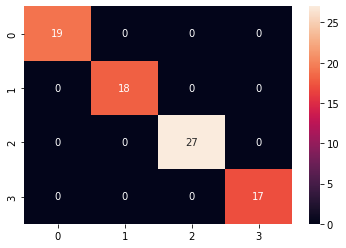

In [12]:
sns.heatmap(cf_matrix,annot=True)

In [13]:
print(sampleClassificationReport)

                precision    recall  f1-score   support

          Good       1.00      1.00      1.00        19
  Satisfactory       1.00      1.00      1.00        18
  Unacceptable       1.00      1.00      1.00        27
Unsatisfactory       1.00      1.00      1.00        17

      accuracy                           1.00        81
     macro avg       1.00      1.00      1.00        81
  weighted avg       1.00      1.00      1.00        81



In [14]:
inputs=[0.28,0.45,0.71,1.12,1.8,2.8,4.5,7.1,11.2,18,28,45]
data = {
        'Vibrational velocity in mm/s':  np.reshape(inputs,(len(inputs))),
        'Class-1':['Good','Good','Good','Satisfactory','Satisfactory','Unsatisfactory','Unsatisfactory','Unacceptable','Unacceptable','Unacceptable','Unacceptable','Unacceptable'],
        'Class-2':['Good','Good','Good','Good','Satisfactory','Satisfactory','Unsatisfactory','Unsatisfactory','Unacceptable','Unacceptable','Unacceptable','Unacceptable'],
        'Class-3':['Good','Good','Good','Good','Good','Satisfactory','Satisfactory','Unsatisfactory','Unsatisfactory','Unacceptable','Unacceptable','Unacceptable'],
        'Class-4':['Good','Good','Good','Good','Good','Good','Satisfactory','Satisfactory','Unsatisfactory','Unsatisfactory','Unacceptable','Unacceptable']
       }
table = pd.DataFrame(data,index=np.arange(1,len(inputs)+1,1))
table.head(len(inputs))

,Vibrational velocity in mm/s,Class-1,Class-2,Class-3,Class-4
1,0.28,Good,Good,Good,Good
2,0.45,Good,Good,Good,Good
3,0.71,Good,Good,Good,Good
4,1.12,Satisfactory,Good,Good,Good
5,1.80,Satisfactory,Satisfactory,Good,Good
6,2.80,Unsatisfactory,Satisfactory,Satisfactory,Good
7,4.50,Unsatisfactory,Unsatisfactory,Satisfactory,Satisfactory
8,7.10,Unacceptable,Unsatisfactory,Unsatisfactory,Satisfactory
9,11.20,Unacceptable,Unacceptable,Unsatisfactory,Unsatisfactory
10,18.00,Unacceptable,Unacceptable,Unacceptable,Unsatisfactory


In [15]:
def randcolor():
    r = 0
    b = random.randint(0,255)
    g = random.randint(0,255)
    color = (r, g, b)
    return tuple(color)
def rgb_to_hex():
    return '#%02x%02x%02x' % randcolor()

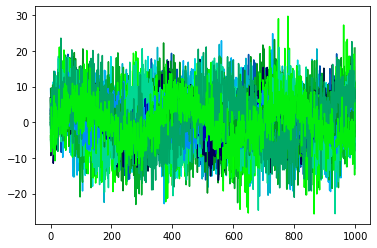

In [16]:
wave_set=[]
t=np.arange(1000)
n=30
def wavesetGenerator(waveset,n):
    waveset.clear()
    for i in range (n):
        wavetemp=[]
        amplitude=random.randrange(0,10)
        period=random.randrange(100,500)
        wavetemp=amplitude*np.sin(2*np.pi*t/period)
        stdev=np.std(wavetemp)
        mean=np.mean(wavetemp)
        noise = np.random.normal(mean,stdev,1000)
        wavetemp=wavetemp+noise
        waveset.append(list(wavetemp))
    waveset=np.array(waveset)
    return waveset
wavesetGenerator(wave_set,n)
for i in range(n):
    plt.plot(t,wave_set[i],color=rgb_to_hex())
plt.show()          

In [17]:
def rmsFinder(inputwave):
    rms=0
    for i in inputwave:
        rms+=i**2
    rms/=len(inputwave)
    rms=np.sqrt(rms)
    return rms

In [18]:
inputs=[]
for i in range (n):
    inputs.append(rmsFinder(wave_set[i]))
inputs.sort()
# print(inputs)
inputs=np.reshape(inputs,(n,1))
output=classifier.predict(inputs)
data = {
        'Vibrational velocity in mm/s':  np.reshape(inputs,(len(inputs))),
        'Predicted health status': output
       }
table = pd.DataFrame(data,index=np.arange(1,n+1,1))
table.head(n)

,Vibrational velocity in mm/s,Predicted health status
1,0.000000,Good
2,0.000000,Good
3,0.992541,Good
4,1.003607,Good
5,1.040918,Good
6,2.016584,Good
7,2.038622,Good
8,2.976148,Satisfactory
9,2.998882,Satisfactory
10,3.003102,Satisfactory
